# Lab 7. Clustering

**Author:** &nbsp;&nbsp;&nbsp;*Gabriel Szewczyk*</br>
**Date:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*23.04.2024*

## k-means

### Exercise 1. k-means

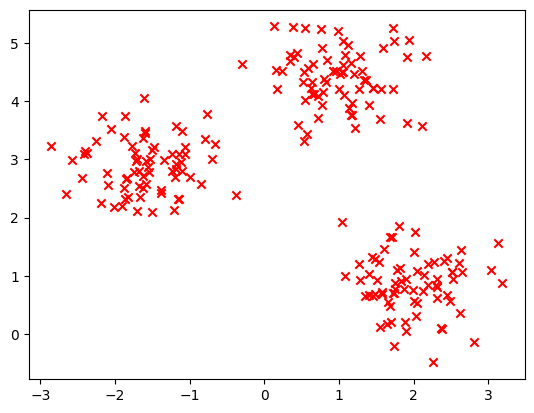

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
 
X, y= make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=0.5, shuffle=True,random_state=0)

plt.scatter(X[:,0], X[:,1], c='red', marker='x')

implementate model

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', max_iter=int(1e5), tol=int(1e-5))
pred = kmeans.fit_predict(X, y)

visualize prediction

Text(0, 0.5, 'X1')

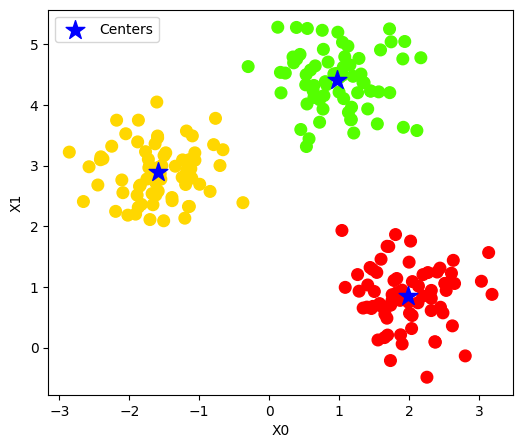

In [19]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=kmeans.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

Evaluate distortion value

In [20]:
print(f"Distortion value: {kmeans.inertia_}")

Distortion value: 98.78710787930852


### Exercise 2. k-means

change the parameters of the data generating function and the k-means model from the task before(number of clusters, e.g. 5 and cluster_std=0.8).

Text(0, 0.5, 'X1')

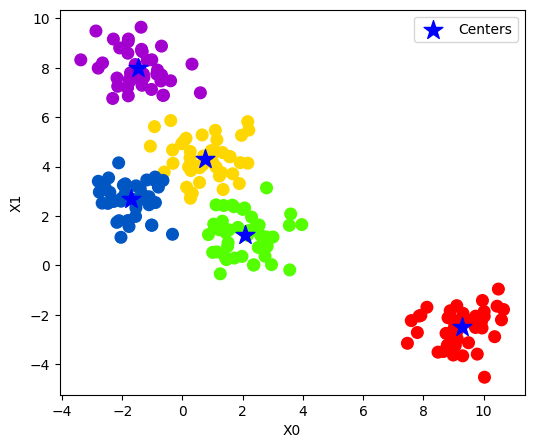

In [21]:
X, y= make_blobs(n_samples=210, centers=5, n_features=2, cluster_std=0.8, shuffle=True, random_state=0)

kmeans2 = KMeans(n_clusters=5, init='random', max_iter=int(1e5), tol=int(1e-5))
pred = kmeans2.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=kmeans2.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

For different number of clusters

Text(0, 0.5, 'X1')

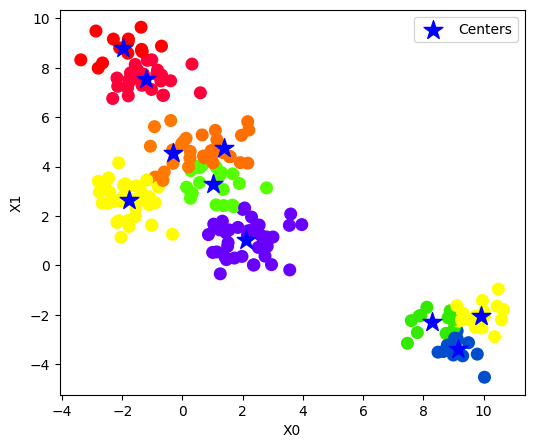

In [22]:
kmeans_diff = KMeans(n_clusters=10, init='random', max_iter=int(1e5), tol=int(1e-5))
pred = kmeans_diff.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=kmeans_diff.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans_diff.cluster_centers_[:, 0], kmeans_diff.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

distortion value for clustering done above

In [23]:
print(f"Distortion value for the same number of clusters: {kmeans2.inertia_}")
print(f"Distortion value for different number of clusters: {kmeans_diff.inertia_}")

Distortion value for the same number of clusters: 245.46565925804066
Distortion value for different number of clusters: 155.58868516570294


### Exercise 3. k-means ++

Test values for different initialization method - k-means++

Text(0, 0.5, 'X1')

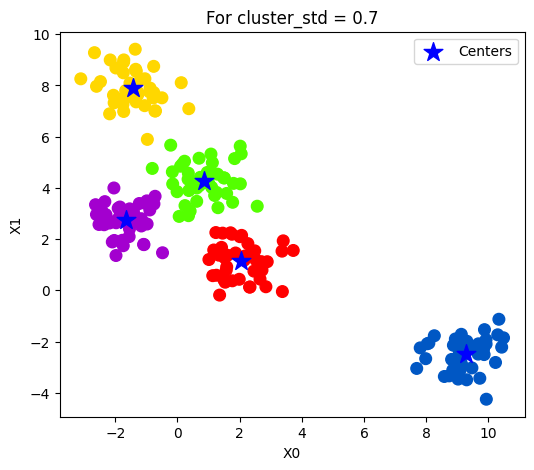

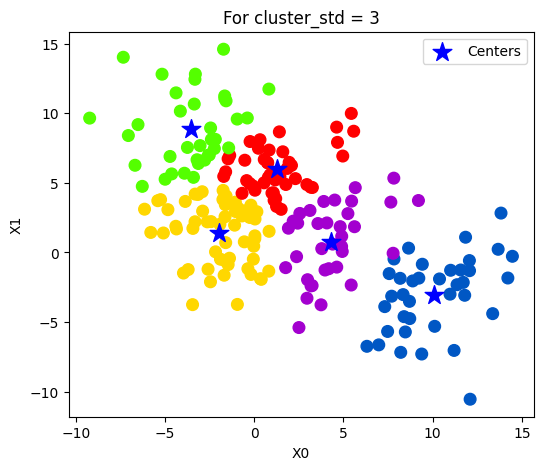

In [24]:
X, y= make_blobs(n_samples=210, centers=5, n_features=2, cluster_std=0.7, shuffle=True, random_state=0)

init = 'k-means++'
kmeans07 = KMeans(n_clusters=5, init=init, max_iter=int(1e5), tol=int(1e-5))
pred = kmeans07.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=kmeans07.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans07.cluster_centers_[:, 0], kmeans07.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.title('For cluster_std = 0.7')
plt.xlabel('X0')
plt.ylabel('X1')

# another std
X, y= make_blobs(n_samples=210, centers=5, n_features=2, cluster_std=3, shuffle=True, random_state=0)

init = 'k-means++'
kmeans3 = KMeans(n_clusters=5, init=init, max_iter=int(1e5), tol=int(1e-5))
pred = kmeans3.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=kmeans3.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.title('For cluster_std = 3')
plt.xlabel('X0')
plt.ylabel('X1')

### Exercise 4. Elbow Method - Optimal Number of Clusters

Implement the elbow method to determine the optimal number of centroids 
*k* based on the analysis of distortion values

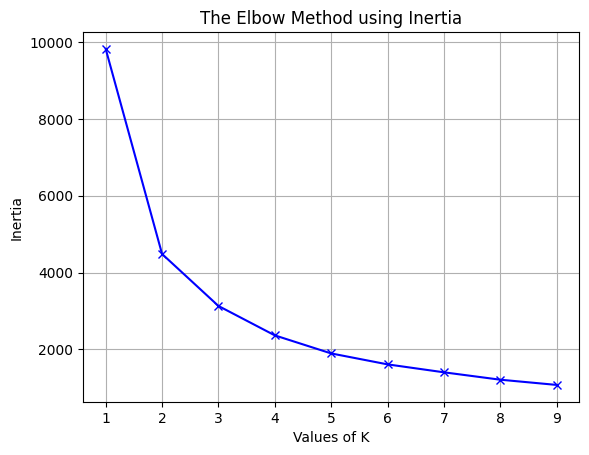

In [25]:
from scipy.spatial.distance import cdist

K = range(1, 10)
 
def elbow_method(K: list):
    """Method plots values of inertia for each k from K list

    Args:
        K (list): values of k to test
    """
    inertias = []
    for k in K:
        kmeanModel = KMeans(n_clusters=k, init='random', max_iter=int(1e5), tol=int(1e-5)).fit(X)
        kmeanModel.fit(X)
        inertias.append(kmeanModel.inertia_)
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.grid()
    plt.show()

elbow_method(K)

### Exercise 5. K-means for different example

Check if the K-Means algorithm correctly clusters the following data

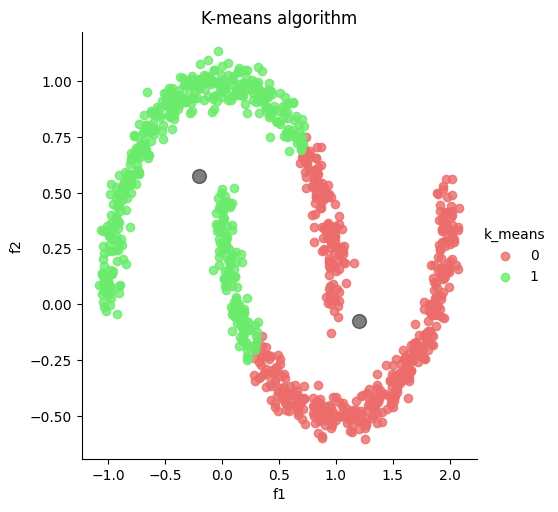

In [26]:
from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

# clustering
km = KMeans(n_clusters=2, init='random', max_iter=int(1e5), tol=int(1e-5))
y_km = km.fit_predict(x)

#wykres
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='K-means algorithm')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
plt.show()

*Due to the nonlinear shape of the data, the K-means algorithm did not fit the cluster locations appropriately.*

### Silhouette analysis - quantitative analysis of clustering

Conduct silhouette analysis for KMeans clustering on sample data

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5748362978270065
For n_clusters = 6 The average silhouette_score is : 0.4504281968733957


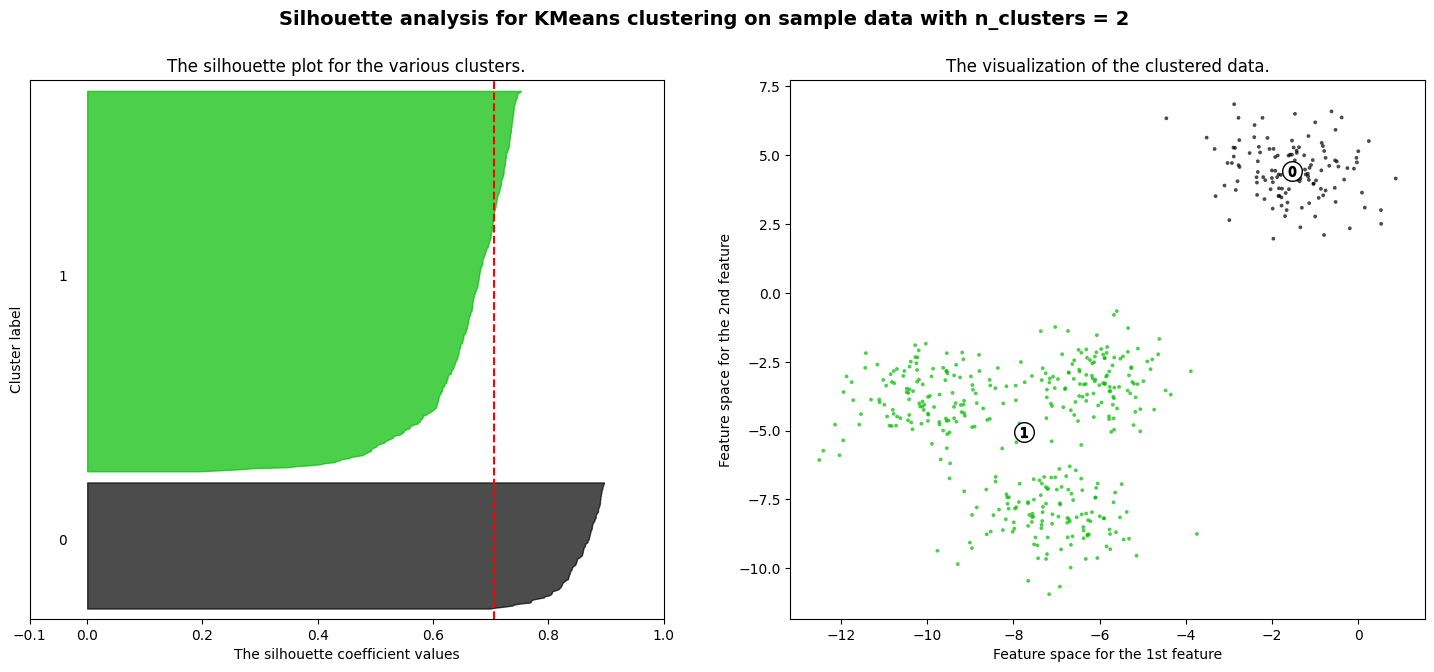

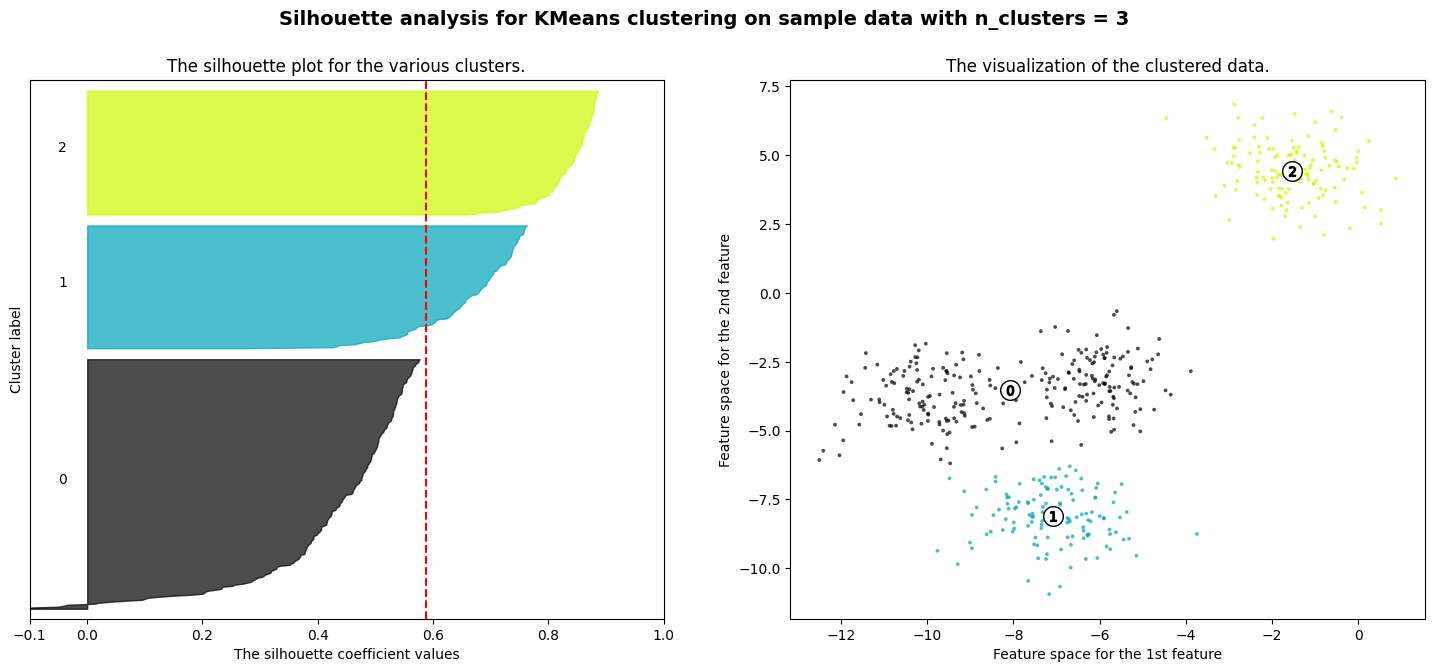

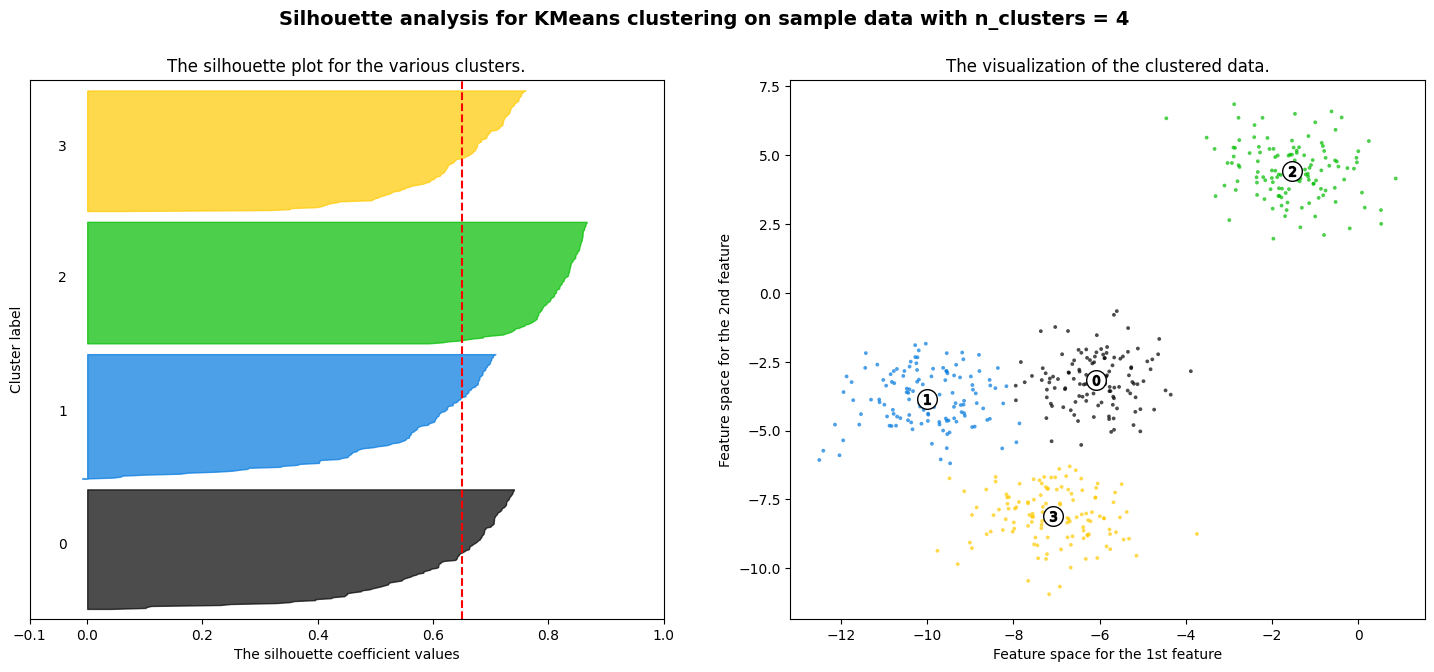

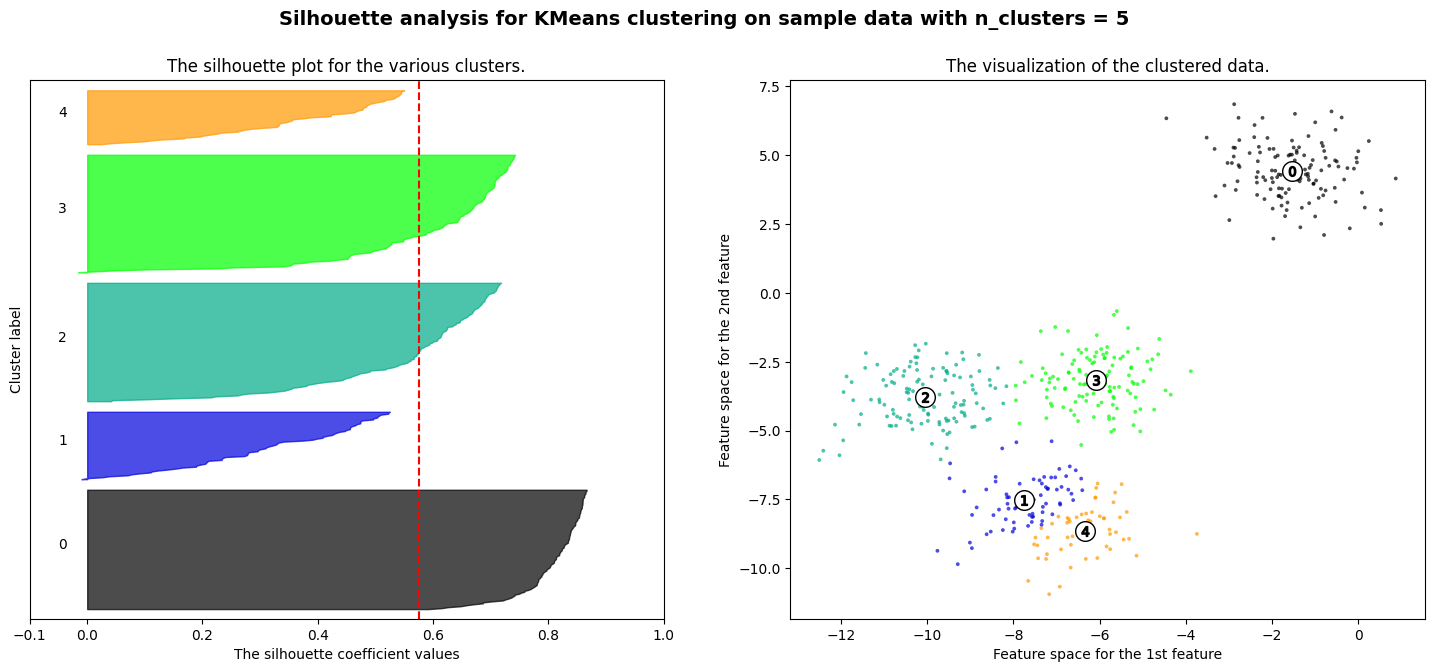

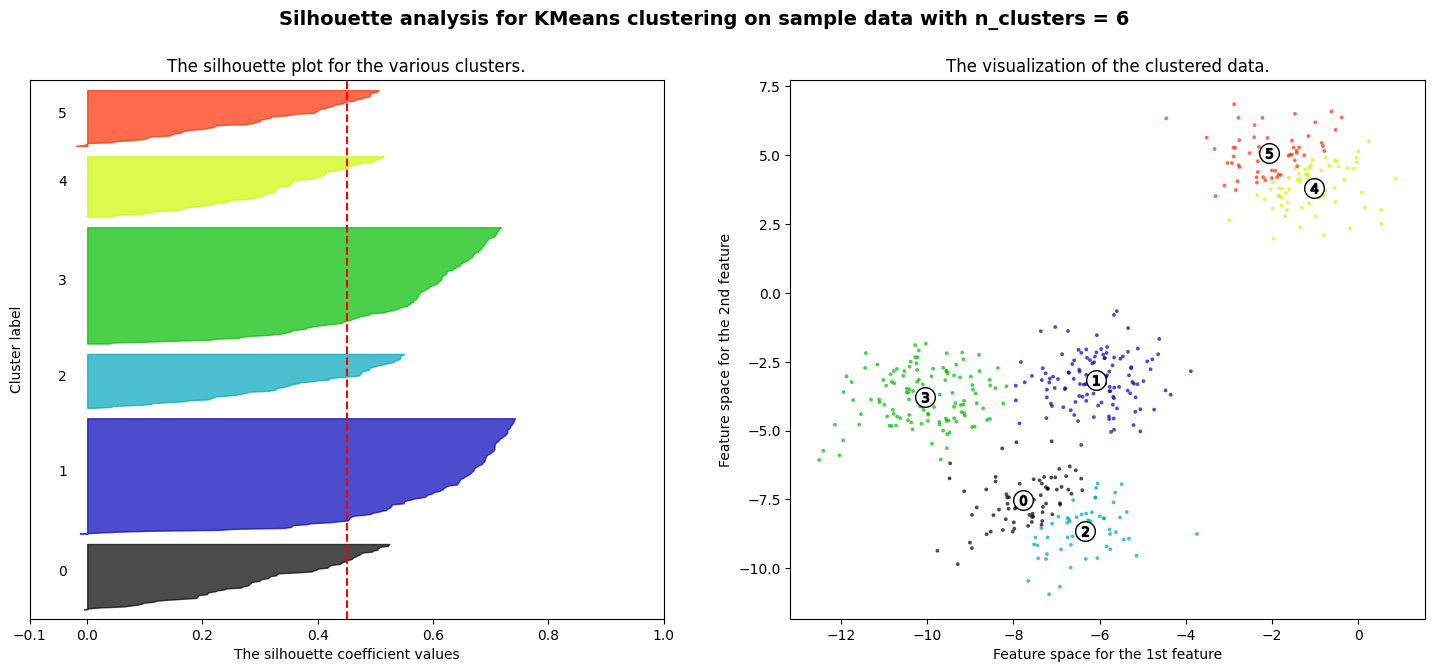

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
 
 
# Generate data
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

# Choose number of cetroids for comparison
range_n_clusters = [2, 3, 4, 5, 6]
 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
    # k_means clustering
    
 
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='random')
   # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(X)
 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Wyznacz współczynnik profilu dla każdego przypadku wykorzystując funkcję silhouette_samples
    sample_silhouette_values = silhouette_samples(X, cluster_labels, metric='euclidean')
 
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
 
        ith_cluster_silhouette_values.sort()
 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
 
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
 
plt.show()

## Hierarchical clustering

### Agglomerative clustering

This section makes comparison between different methods of agglomerative clustering:
- average linkage
- Ward method
- complete linkage
- single linkage

import shopping_data

In [28]:
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  
import os
path = os.getcwd() + '/shopping_data.csv'
customer_data = pd.read_csv(path)  
 
data = customer_data.iloc[:, 3:5].values
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Compare different metric methods in agglomerative clustering

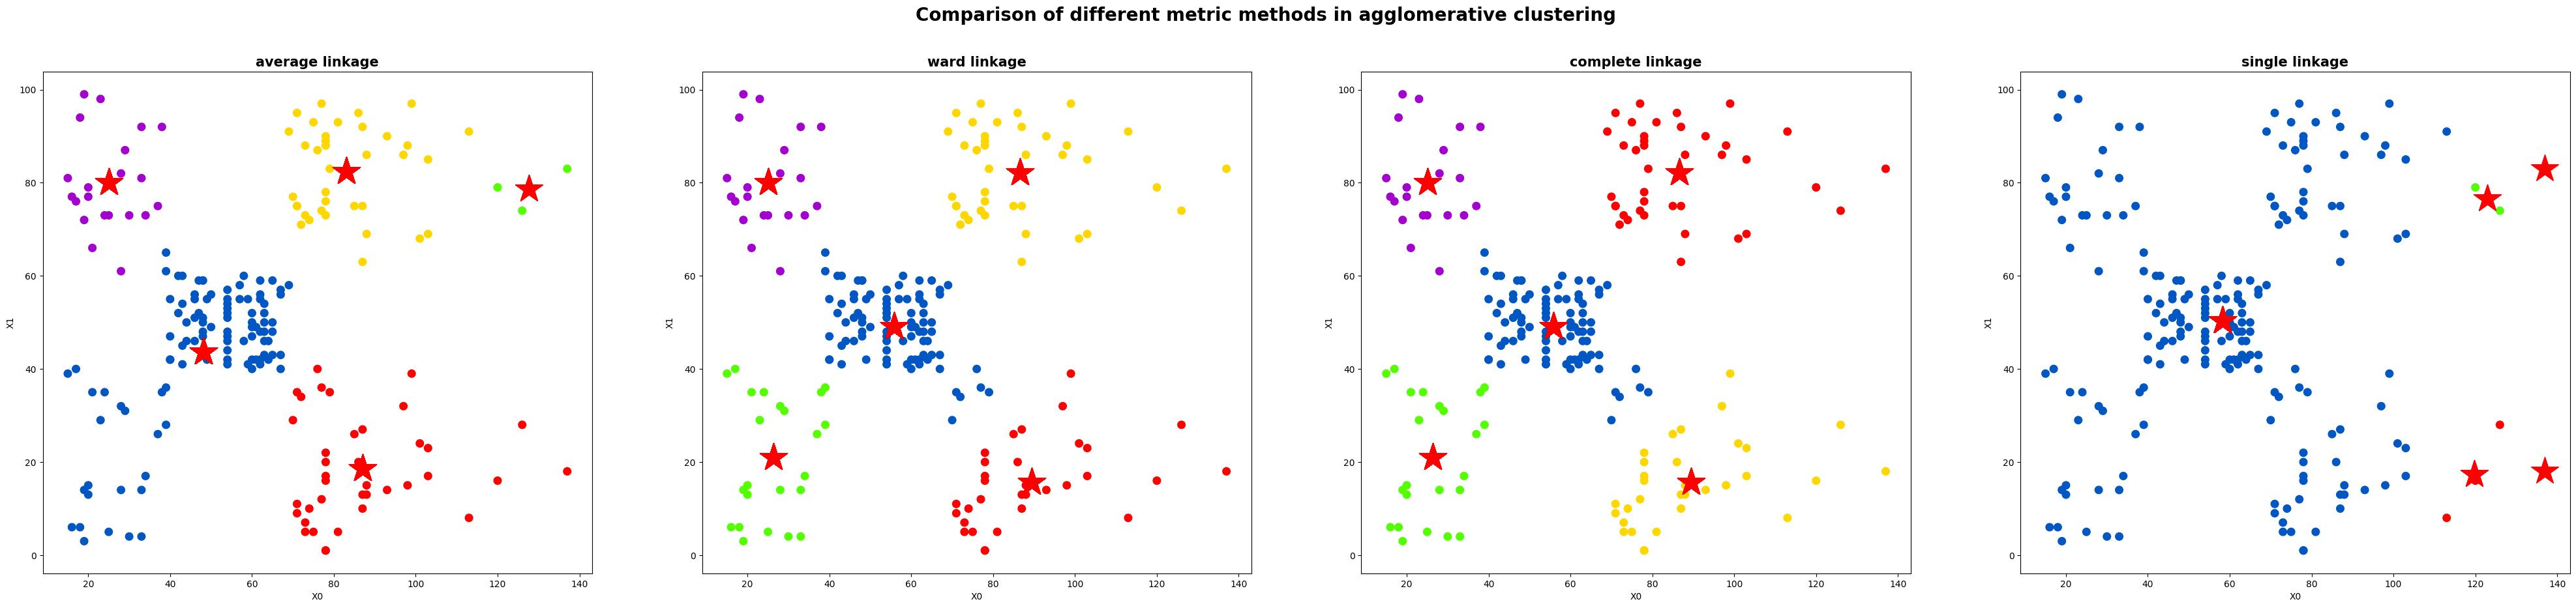

In [29]:
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['average', 'ward', 'complete', 'single']


fig, axs = plt.subplots(1, 4, figsize=(50, 10))
axs = axs.flatten()
plt.suptitle("Comparison of different metric methods in agglomerative clustering", fontsize=20, fontweight='bold')
for i in range(len(linkage_methods)):
    agg_cluster = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage=linkage_methods[i])
    pred = agg_cluster.fit_predict(data)

    # find centroids 
    centroids = []
    for cluster_label in pred:
        cluster_points = data[pred == cluster_label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)

    centroids = np.array(centroids)

    axs[i].scatter(data[:,0], data[:,1], s=70, c=agg_cluster.labels_, cmap=plt.cm.prism) 
    axs[i].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=1000,
                color='red')
    axs[i].set_title(f'{linkage_methods[i]} linkage', fontweight='bold', fontsize=15)
    axs[i].set_xlabel('X0')
    axs[i].set_ylabel('X1')

*We can use the single linkage metric. However,  outcome of this method doesn't seem to be proper fit for this example.*

### Dendrograms

Create dendrograms for different metric methods

([], [])

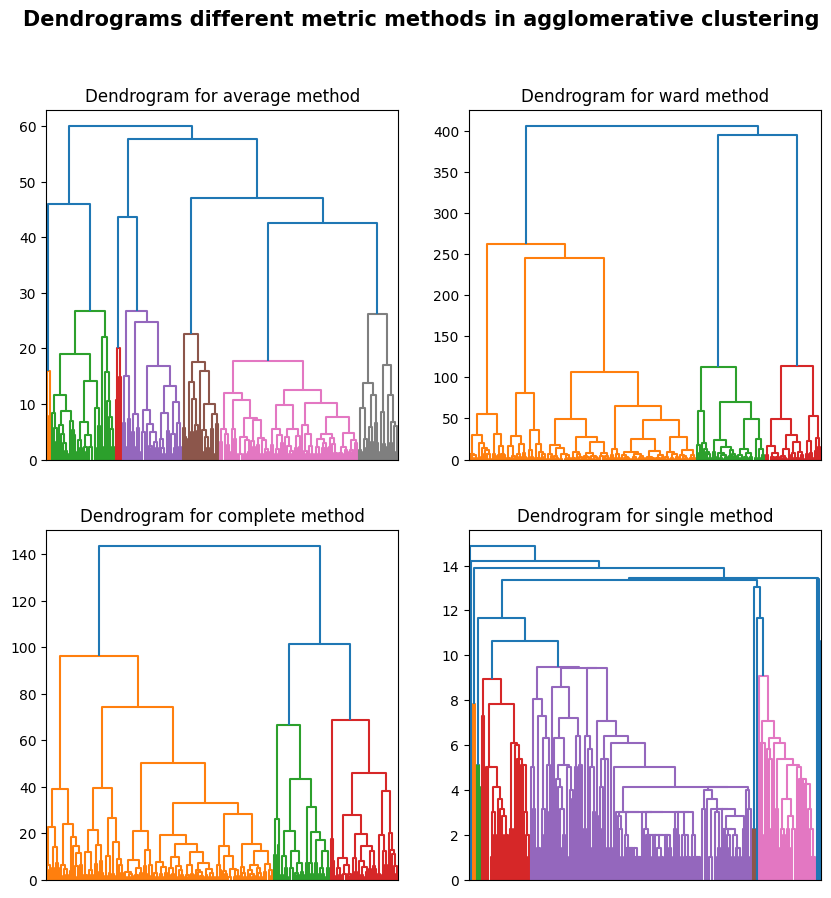

In [30]:
import scipy.cluster.hierarchy as ch

plt.figure(figsize=(10,10))
plt.suptitle("Dendrograms different metric methods in agglomerative clustering", fontsize=15, fontweight='bold')

plt.subplot(2,2,1)
Z = ch.linkage(data, linkage_methods[0])
plt.title(f"Dendrogram for {linkage_methods[0]} method")
ch.dendrogram(Z=Z)
plt.xticks([])

plt.subplot(2,2,2)
Z = ch.linkage(data, linkage_methods[1])
plt.title(f"Dendrogram for {linkage_methods[1]} method")
ch.dendrogram(Z=Z)
plt.xticks([])

plt.subplot(2,2,3)
Z = ch.linkage(data, linkage_methods[2])
plt.title(f"Dendrogram for {linkage_methods[2]} method")
ch.dendrogram(Z=Z)
plt.xticks([])

plt.subplot(2,2,4)
Z = ch.linkage(data, linkage_methods[3])
plt.title(f"Dendrogram for {linkage_methods[3]} method")
ch.dendrogram(Z=Z)
plt.xticks([])

*Analyzing the dendrogram using the Ward method, which yields the best results in this case compared to other methods, one can infer that the number of clusters should be reduced to 4.*

### Aglomerative clustering for 'moon' data

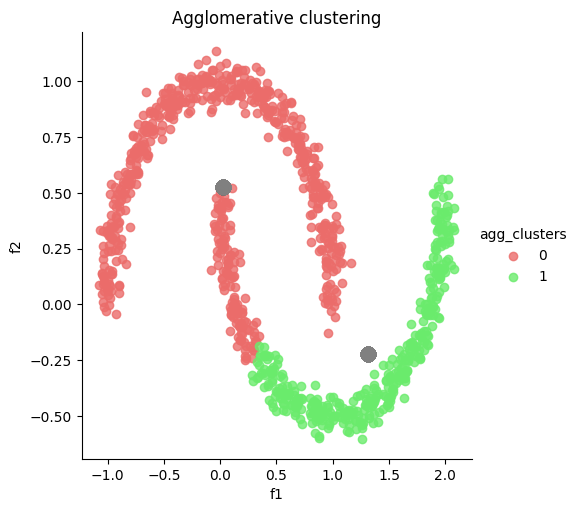

In [31]:
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

# clustering
agg_cluster = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage='ward')
pred = agg_cluster.fit_predict(x)

# find centroids 
centroids = []
for cluster_label in pred:
    cluster_points = X_moon[pred == cluster_label]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

#wykres
X_moon['agg_clusters'] = pred
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'agg_clusters', palette = ['#eb6c6a', '#6aeb6c']).set(title='Agglomerative clustering')
plt.scatter(centroids[:, 0], centroids[:, 1], c='grey', s=100, alpha=0.5)
plt.show()